# Programming Exercise 6: Support Vector Machines
In this exercise, you will be using support vector machines (SVMs) to build a
spam classifier.

In [1]:
# Scientific and vector computation for python
import numpy as np

# Import regular expressions process emails
import re

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions
import utils

# tells matplotlib to embed plots with the notebook
%matplotlib inline

## 1 Support Vector Machines
In the first half of this exercise, you will be using support vector machines
(SVMs) with various example 2D datasets. Experimenting with these datasets will
help you gain an intuition of how SVMs work and how to use a Gaussian kernel
with SVMs. In the next half of the exercise, you will be using support vector
machines to build a spam classifier.

### 1.1 Example Dataset 1
We will begin by with a 2D example dataset which can be separated by a linear
boundary. The following cell plots the training data.
In this dataset, the positions of the positive examples (indicated with $\times$)
and the negative examples (indicated with $\circ$) suggest a natural separation
indicated by the gap. However, notice that there is an outlier positive example
$\times$ on the far left at about (0.1, 4.1). As part of this exercise, you will
also see how this outlier affects the SVM decision boundary.

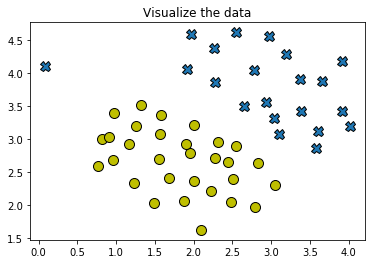

In [2]:
# Load from ex6data1.mat
# You will have X, y as keys in the dict data
data = loadmat('ex6data1.mat')
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)
plt.title('Visualize the data');

In this part of the exercise, you will try using different values of the $C$
parameter with SVMs. Informally, the $C$ parameter is a positive value that
controls the penalty for misclassified training examples. A large $C$ parameter
tells the SVM to try to classify all the examples correctly. $C$ plays a role
similar to $1/\lambda$, where $\lambda$ is the regularization parameter that we
were using previously for logistic regression.

The following cell will run the SVM training (with $C=1$) using SVM software
(function svmTrain within the utils module of this exercise).

SVM Decision boundary for example dataset 1 ($C = 1$)

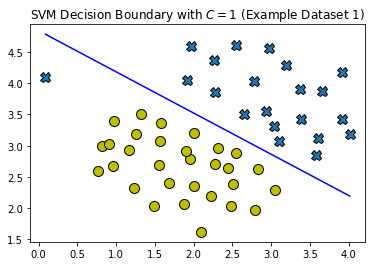

In [3]:
# You should try to change the C value below and see how the decision boundary varies
model_1 = utils.svmTrain(X, y, C=1, kernelFunction=utils.linearKernel, tol=1e-3, max_passes=20)
utils.visualizeBoundaryLinear(X, y, model_1)
# utils.plotData(X, y)
plt.title(r'SVM Decision Boundary with $C = 1$ (Example Dataset 1)');

SVM Decision boundary for example dataset 1 ($C = 100$)

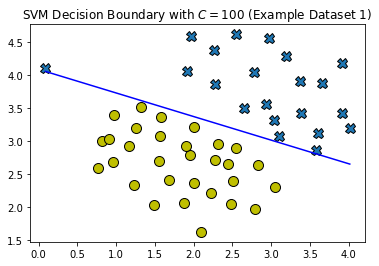

In [4]:
model_2 = utils.svmTrain(X, y, C=100, kernelFunction=utils.linearKernel, tol=1e-3, max_passes=20)
utils.visualizeBoundaryLinear(X, y, model_2)
# utils.plotData(X, y)
plt.title(r'SVM Decision Boundary with $C = 100$ (Example Dataset 1)');

### 1.2 SVM with Gaussian Kernels
In this part of the exercise, you will be using SVMs to do non-linear
classification. In particular, you will be using SVMs with Gaussian kernels on
datasets that are not linearly separable.

#### 1.2.1 Gaussian Kernel
To find non-linear decision boundaries with the SVM, we need to first
implement a Gaussian kernel. You can think of the Gaussian kernel as a
similarity function that measures the “distance” between a pair of examples,
($x^{(i)}, x^{(j)}$). The Gaussian kernel is also parameterized by a bandwidth
parameter, $\sigma$, which determines how fast the similarity metric decreases
(to 0) as the examples are further apart. You should now complete the code in
`gaussianKernel` to compute the Gaussian kernel between two examples,
($x^{(i)}, x^{(j)}$). The Gaussian kernel function is defined as:

$$ K_{\text{gaussian}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x^{(i)} - x^{(j)}\right\lvert\right\lvert^2}{2\sigma^2} \right) = \exp \left( -\frac{\sum_{k=1}^n \left( x_k^{(i)} - x_k^{(j)}\right)^2}{2\sigma^2} \right)$$

In [5]:
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.

    Parameters
    ----------
    x1 :  numpy ndarray
        A vector of size (n, ), representing the first datapoint.

    x2 : numpy ndarray
        A vector of size (n, ), representing the second datapoint.

    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    sim : float
        The computed RBF between the two provided data points.
    """
    sim = np.exp(-np.sum((x1 - x2)**2) / (2 * (sigma**2)))

    return sim

Once you have completed the function `gaussianKernel`, the following cell will
test your kernel function on two provided examples and you should expect to see
a value of 0.324652.

In [6]:
x1, x2 = np.array([1, 2, 1]), np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = {:}, x2 = {:}, sigma = {:.2f}:'
      '\n{:.6f}\t(for simga = 2, this value should be about 0.324652)'.
      format(x1, x2, sigma, sim))

Gaussian Kernel between x1 = [1 2 1], x2 = [ 0  4 -1], sigma = 2.00:
0.324652	(for simga = 2, this value should be about 0.324652)


#### Example Dataset 2
The next part in this notebook will load and plot dataset 2.

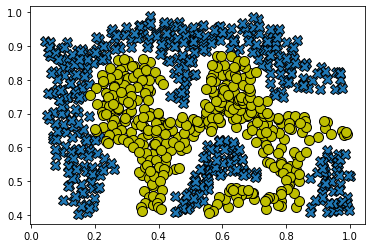

In [7]:
# Load from ex6data2.mat
# You will have X, y as keys in the dict data
data = loadmat('ex6data2.mat')
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

From the figure, you can observe that there is no linear decision boundary that
separates the positive and negative examples for this dataset. However, by using
the Gaussian kernel with the SVM, you will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset. If you have
correctly implemented the Gaussian kernel function, the following cell will
proceed to train the SVM with the Gaussian kernel on this dataset.

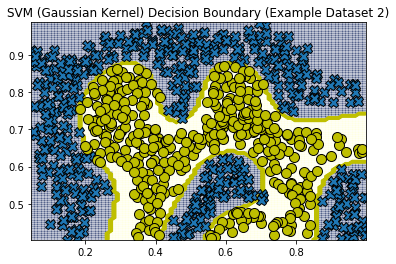

In [8]:
# SVM parameters
C, sigma = 1, 0.1

model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)
plt.title('SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)');

#### 1.2.3 Example Dataset 3
In this part of the exercise, you will gain more practical skills on how to use
a SVM with a Gaussian kernel. The next cell will load and display a third
dataset. You will be using the SVM with the Gaussian kernel with this dataset.
In the provided dataset, `ex6data3.mat`, you are given the variables `X`, `y`,
`Xval`, `yval`.

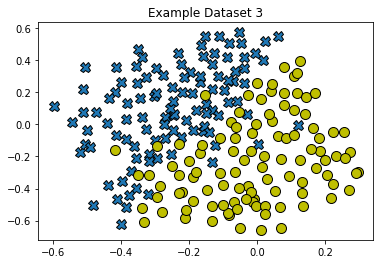

In [9]:
data = loadmat('ex6data3.mat')
X, y, Xval, yval = data['X'], data['y'][:, 0], data['Xval'], data['yval'][:, 0]

# Plot training data
utils.plotData(X, y)
plt.title('Example Dataset 3');

Your task is to use the cross validation set `Xval`, `yval` to determine the
best $C$ and $\sigma$ parameter to use. You should write any additional code
necessary to help you search over the parameters $C$ and $\sigma$. For both
$C$ and $\sigma$, we suggest trying values in multiplicative steps (e.g., 0.01,
0.03, 0.1, 0.3, 1, 3, 10, 30). Note that you should try all possible pairs of
values for $C$ and $\sigma$ (e.g., $C = 0.3$ and $\sigma = 0.1$). For example,
if you try each of the 8 values listed above for $C$ and for $\sigma^2$, you
would end up training and evaluating (on the cross validation set) a total of
$8^2 = 64$ different models. After you have determined the best $C$ and
$\sigma$ parameters to use, you should modify the code in `dataset3Params`,
filling in the best parameters you found.

In [10]:
def dataset3Params(X, y, Xval, yval):
    """
    Returns your choice of C and sigma for Part 3 of the exercise
    where you select the optimal (C, sigma) learning parameters to use for SVM
    with RBF kernel.

    Parameters
    ----------
    X : array_like
        (m x n) matrix of training data where m is number of training examples,
        and n is the number of features.

    y : array_like
        (m, ) vector of labels for ther training data.

    Xval : array_like
        (mv x n) matrix of validation data where mv is the number of validation
        examples and n is the number of features

    yval : array_like
        (mv, ) vector of labels for the validation data.

    Returns
    -------
    C, sigma : float, float
        The best performing values for the regularization parameter C and
        RBF parameter sigma.
    """
    C_array = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    sigma_array = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])

    err_array = np.zeros([C_array.size, sigma_array.size])

    for i in np.arange(C_array.size):
        for j in np.arange(sigma_array.size):
            model = utils.svmTrain(X, y, C_array[i], gaussianKernel, args=(sigma_array[j],))
            predictions = utils.svmPredict(model, Xval)
            pred_error = np.mean(predictions != yval)
            err_array[i, j] = pred_error
    idx = np.unravel_index(np.argmin(err_array, axis=None), err_array.shape)
    C = C_array[idx[0]]
    sigma = sigma_array[idx[1]]

    return C, sigma

The provided code in the next cell trains the SVM classifier using the training
set $(X, y)$ using parameters loaded from `dataset3Params`. Note that this
might take a few minutes to execute.

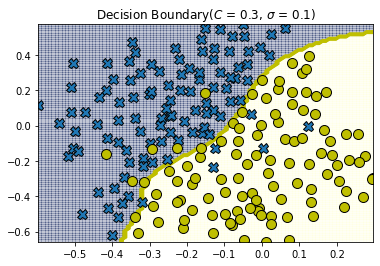

In [11]:
# Try different SVM parameters here
C, sigma = dataset3Params(X, y, Xval, yval)

# Train the SVM
model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)
plt.title(r'Decision Boundary($C$ = {:}, $\sigma$ = {:})'.format(C, sigma));

## 2 Spam Classification
Many email services today provide spam filters that are able to classify emails
into spam and non-spam email with high accuracy. In this part of the exercise,
you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, $x$, is
spam $(y = 1)$ or non-spam $(y = 0)$. In particular, you need to convert each
email into a feature vector $x\in \Bbb{R}^n$ . The following parts of the
exercise will walk you through how such a feature vector can be constructed
from an email.

The dataset included for this exercise is based on a a subset of the
[SpamAssassin Public Corpus](http://spamassassin.apache.org/old/publiccorpus/).
For the purpose of this exercise, you will only be using the body of the email
(excluding the email headers).

### 2.1 Preprocessing Emails
Before starting on a machine learning task, it is usually insightful to take a
look at examples from the dataset. The figure below shows a sample email that
contains a URL, an email address (at the end), numbers, and dollar amounts.

![NGua8I.png](https://s1.ax1x.com/2020/06/22/NGua8I.png)

While many emails would contain similar types of entities (e.g., numbers, other
URLs, or other email addresses), the specific entities (e.g., the specific URL
or specific dollar amount) will be different in almost every email. Therefore,
one method often employed in processing emails is to “normalize” these values,
so that all URLs are treated the same, all numbers are treated the same, etc.
For example, we could replace each URL in the email with the unique string
“httpaddr” to indicate that a URL was present.

This has the effect of letting the spam classifier make a classification
decision based on whether any URL was present, rather than whether a specific
URL was present. This typically improves the performance of a spam classifier,
since spammers often randomize the URLs, and thus the odds of seeing any
particular URL again in a new piece of spam is very small.

In the function `processEmail` below, we have implemented the following email
preprocessing and normalization steps:

- **Lower-casing**: The entire email is converted into lower case, so that
capitalization is ignored (e.g., IndIcaTE is treated the same as Indicate).
- **Stripping HTML**: All HTML tags are removed from the emails. Many emails
often come with HTML formatting; we remove all the HTML tags, so that only the
content remains.
- **Normalizing URLs**: All URLs are replaced with the text “httpaddr”.
- **Normalizing Email Addresses**: All email addresses are replaced with the
text “emailaddr”.
- **Normalizing Numbers**: All numbers are replaced with the text “number”.
- **Normalizing Dollars**: All dollar signs (\$) are replaced with the text “dollar”.
- **Word Stemming**: Words are reduced to their stemmed form. For example,
“discount”, “discounts”, “discounted” and “discounting” are all replaced with
“`discount`”. Sometimes, the Stemmer actually strips off additional characters
from the end, so “include”, “includes”, “included”, and “including” are all
replaced with “`includ`”.
- **Removal of non-words**: Non-words and punctuation have been removed. All
white spaces (tabs, newlines, spaces) have all been trimmed to a single space
character.

The result of these preprocessing steps is shown in the figure below.

![NGK2wD.png](https://s1.ax1x.com/2020/06/22/NGK2wD.png)

While preprocessing has left word fragments and non-words, this form turns out
to be much easier to work with for performing feature extraction.

#### 2.1.1 Vocabulary List
After preprocessing the emails, we have a list of words for each email. The
next step is to choose which words we would like to use in our classifier and
which we would want to leave out.

For this exercise, we have chosen only the most frequently occuring words as
our set of words considered (the vocabulary list). Since words that occur
rarely in the training set are only in a few emails, they might cause the model
to overfit our training set. The complete vocabulary list is in the file
`vocab.txt` (inside the Data directory for this exercise) and also shown in
the figure below.

![Vocabulary List](https://s1.ax1x.com/2020/06/22/NGKvfs.png)

Our vocabulary list was selected by choosing all words which occur at least a
100 times in the spam corpus, resulting in a list of 1899 words. In practice,
a vocabulary list with about 10,000 to 50,000 words is often used. Given the
vocabulary list, we can now map each word in the preprocessed emails into a
list of word indices that contains the index of the word in the vocabulary
dictionary. The figure below shows the mapping for the sample email.
Specifically, in the sample email, the word “anyone” was first normalized to
“anyon” and then mapped onto the index 86 in the vocabulary list.

![Word Indices for Sample Email](https://s1.ax1x.com/2020/06/22/NGMi0U.png)

Your task now is to complete the code in the function `processEmail` to perform
this mapping. In the code, you are given a string `word` which is a single word
from the processed email. You should look up the word in the vocabulary list
`vocabList`. If the word exists in the list, you should add the index of the
word into the `word_indices` variable. If the word does not exist, and is
therefore not in the vocabulary, you can skip the word.

In [12]:
def processEmail(email_contents, verbose=True):
    """
    Preprocess the body of an email and returns a list of indices
    of the words contained in the email.

    Parameters
    ----------
    email_contents : str
        A string containing one email.

    verbose : bool
        If True, print the resulting email after processing.

    Returns
    -------
    word_indices : list
        A list of integers containing the index of each word in the
        email which is also present in the vocabulary.
    """
    # Load vocabulary
    vocabList = utils.getVocabList()

    # Init return value
    word_indices = []

    # Lower case
    email_contents = email_contents.lower()

    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and dose not have any < or > in the tag it with a space
    email_contents = re.compile('<[^<>]+').sub(' ', email_contents)

    # Handle numbers
    # Look for one or more characters between 0-9
    email_contents = re.compile('[0-9]+').sub(' number ', email_contents)

    # Handle URLs
    # Look for strings starting with http:// or https://
    email_contents = re.compile('(http|https)://[^\s]*').sub(' httpaddr ', email_contents)

    # Handle Email addresses
    # Look for strings with @ in the middle
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)

    # Handle $ sign
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)

    # get rid of any punctuation
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)

    # remove any empty word string
    email_contents = [word for word in email_contents if len(word) > 0]

    # Stem the email contents word by word
    stemmer = utils.PorterStemmer()
    processed_email = []
    for word in email_contents:
        # Remove any remaining non alphanumeric characters in word
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)

        if len(word) < 1:
            continue

        try:
            word_indices.append(vocabList.index(word))
        except ValueError:
            pass

    if verbose:
        print('----------------')
        print('Processed Email:')
        print('----------------')
        print(' '.join(processed_email))
    return word_indices

Once you have implemented `processEmail`, the following cell will run your code
on the email sample and you should see an output of the processed email and the
indices list mapping.

In [13]:
# To use an SVM to classify emails into Spam v.s. Non-Spam, you first need to
# convert each email into a vector of features. In this part, you will implement
# the preprocessing steps for each email. You should complete the code in
# `processEmail` to produce a word indices vector for a given email.

# Extract features
with open('emailSample1.txt') as fid:
    file_contents = fid.read()

word_indices = processEmail(file_contents)

#Print Stats
print('-------------')
print('Word Indices:')
print('-------------')
print(word_indices)

----------------
Processed Email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
-------------
Word Indices:
-------------
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1894, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 476, 1119, 1892, 1509, 798, 1181, 1236, 511, 1119, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


### 2.2 Extracting Features from Emails
You will now implement the feature extraction that converts each email into a
vector in $\Bbb{R}^n$. For this exercise, you will be using $n$ = # words in
vocabulary list. Specifically, the feature  $x_i \in \{0,1\}$  for an email
corresponds to whether the $i^{\text{th}}$ word in the dictionary occurs in the
email. That is, $x_i = 1$ if the $i^{\text{th}}$ word is in the email and $x_i=0$
if the $i^{\text{th}}$ word is not present in the email.

Thus, for a typical email, this feature would look like:

$$x = \begin{bmatrix} 0 & \dots & 1 & 0 & \dots & 1 & 0 & \dots & 0 \end{bmatrix}^T \in \mathbb{R}^n$$

You should now complete the code in the function `emailFeatures` to generate a
feature vector for an email, given the `word_indices`.

In [14]:
def emailFeatures(word_indices):
    """
    Takes in a word_indices vector and produces a feature vector from the word indices.

    Parameters
    ----------
    word_indices : list
        A list of word indices from the vocabulary list.

    Returns
    -------
    x : list
        The computed feature vector.
    """
    # Total number of words in the dictionary
    n = 1899

    x = np.zeros(n)
    x[word_indices] = 1

    return x

Once you have implemented `emailFeatures`, the next cell will run your code on
the email sample. You should see that the feature vector had length 1899 and 45
non-zero entries.

In [15]:
# Extract features
with open('emailSample1.txt') as fid:
    file_contents = fid.read()

word_indices = processEmail(file_contents)
features     = emailFeatures(word_indices)

print('\nLength of feature vector: %d' % len(features))
print('Number of non-zero entries: %d' % sum(features > 0))

----------------
Processed Email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr

Length of feature vector: 1899
Number of non-zero entries: 45


### 2.3 Training SVM for Spam Classification
In the following section we will load a preprocessed training dataset that will
be used to train a SVM classifier. The file `spamTrain.mat` contains 4000
training examples of spam and non-spam email, while `spamTest.mat` contains
1000 test examples. Each original email was processed using the `processEmail`
and `emailFeatures` functions and converted into a vector $x^{(i)} \in \Bbb{R}^{1899}$.

After loading the dataset, the next cell proceed to train a linear SVM to
classify between spam ($y = 1$) and non-spam ($y = 0$) emails. Once the
training completes, you should see that the classifier gets a training accuracy
of about 99.8% and a test accuracy of about 98.5%

In [16]:
# Load the spam email dataset
# You will have X, y in your environment
data = loadmat('spamTrain.mat')
X, y = data['X'].astype(float), data['y'][:, 0]

print('Training Linear SVM (Spam Classification)')
print('This may take 1 to 2 minutes ...')

model = utils.svmTrain(X, y, C=0.1, kernelFunction=utils.linearKernel)

Training Linear SVM (Spam Classification)
This may take 1 to 2 minutes ...


In [20]:
# Compute the training accuracy
p = utils.svmPredict(model, X)

print('Training accuracy: {:.2f}%'.format(np.mean(p == y) * 100))

Training accuracy: 99.83%


Execute the following cell to load the test set and compute the test accuracy.

In [21]:
# Load the test dataset
# You will have Xtest, ytest in your environment
data = loadmat('spamTest.mat')
Xtest, ytest = data['Xtest'].astype(float), data['ytest'][:, 0]

print('Evaluating the trained Linear SVM on a test set ...')
p = utils.svmPredict(model, Xtest)
print('Test accuracy: {:.2f}%'.format(np.mean(p == ytest) * 100))

Evaluating the trained Linear SVM on a test set ...
Test accuracy: 98.70%


### 2.4 Top Predictors for Spam
To better understand how the spam classifier works, we can inspect the parameters
to see which words the classifier thinks are the most predictive of spam. The
next cell finds the parameters with the largest positive values in the
classifier and displays the corresponding words similar to the ones shown in
the figure below.

![NGW2Bq.png](https://s1.ax1x.com/2020/06/22/NGW2Bq.png)

Thus, if an email contains words such as “guarantee”, “remove”, “dollar”, and
“price” (the top predictors shown in the figure), it is likely to be classified
as spam.

Since the model we are training is a linear SVM, we can inspect the weights
learned by the model to understand better how it is determining whether an
email is spam or not. The following code finds the words with the highest
weights in the classifier. Informally, the classifier 'thinks' that these
words are the most likely indicators of spam.

In [22]:
# Sort the weights and obtain the vocabulary list. NOTE: some words have the
# same weights, so their order might be different than in the text above.
idx = np.argsort(model['w'])
top_idx = idx[-15:][::-1]
vocabList = utils.getVocabList()

print('Top predictors of spam:')
print('{:15s} {:15s}'.format('word', 'weight'))
print('----' + ' ' * 12 + '------')
for word, w in zip(np.array(vocabList)[top_idx], model['w'][top_idx]):
    print('{:15s} {:.2f}'.format(word, w))

Top predictors of spam:
word            weight         
----            ------
our             0.50
click           0.47
remov           0.42
guarante        0.39
visit           0.37
basenumb        0.35
dollar          0.33
pleas           0.27
price           0.27
will            0.27
nbsp            0.26
lo              0.25
most            0.25
da              0.24
hour            0.24


### 2.5 Try your own emails
Now that you have trained a spam classifier, you can start trying it out on your
own emails. In the starter code, we have included two email examples
(`emailSample1.txt` and `emailSample2.txt`) and two spam examples
(`spamSample1.txt` and `spamSample2.txt`). The next cell runs the spam
classifier over the first spam example and classifies it using the learned SVM.
You should now try the other examples we have provided and see if the
classifier gets them right. You can also try your own emails by replacing the
examples (plain text files) with your own emails.

In [28]:
filename = 'emailSample1.txt'
with open(filename) as fid:
    file_contents = fid.read()

word_indices = processEmail(file_contents, verbose=False)
x = emailFeatures(word_indices)
p = utils.svmPredict(model, x)

print('{:20s} {:20s}'.format('Processed file', 'Spam Classification'))
print('--------------' + ' ' * 7 + '-------------------')
print('{:20s} {:20s}'.format(filename, 'spam' if p else 'not spam'))

Processed file       Spam Classification 
--------------       -------------------
emailSample1.txt     not spam            


### 2.6 Build your own dataset
In this exercise, we provided a preprocessed training set and test set. These
datasets were created using the same functions (`processEmail` and `emailFeatures`)
that you now have completed. For this optional (ungraded) exercise, you will
build your own dataset using the original emails from the
[SpamAssassin Public Corpus](https://spamassassin.apache.org/old/publiccorpus/).

Your task in this optional (ungraded) exercise is to download the original
files from the public corpus and extract them. After extracting them, you
should run the `processEmail` and `emailFeatures` functions on each email to
extract a feature vector from each email. This will allow you to build a
dataset `X`, `y` of examples. You should then randomly divide up the dataset
into a training set, a cross validation set and a test set.

While you are building your own dataset, we also encourage you to try building
your own vocabulary list (by selecting the high frequency words that occur in
the dataset) and adding any additional features that you think might be useful.
Finally, we also suggest trying to use highly optimized SVM toolboxes such as
[`LIBSVM`](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) or
[`scikit-learn`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm).
















